In [10]:
!pip install networkx
!pip install matplotlib
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 504.6 kB/s  0:00:53m0:00:0100:02


Matplotlib is building the font cache; this may take a moment.


Degree of London: 3
Degree of Edinburgh: 1


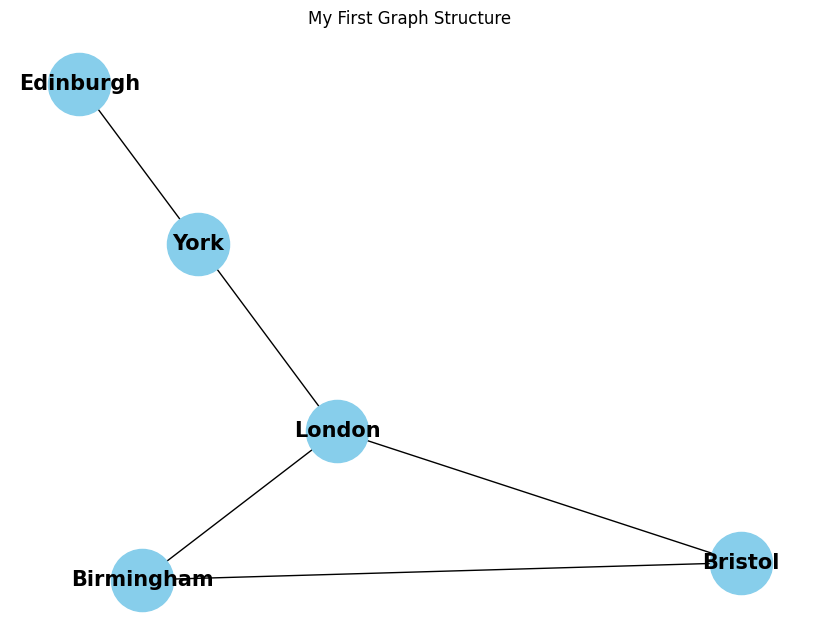

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Create the Graph Object (The "Math" part)
# We are building the graph from Slide 9 (Network Example)
G = nx.Graph()

# 2. Add Nodes (Cities/Servers)
cities = ["Edinburgh", "Birmingham", "London", "Bristol", "York"]
G.add_nodes_from(cities)

# 3. Add Edges (The Connections)
# Let's say Edinburgh connects to York, and York to London (Hypothetical)
edges = [
    ("Edinburgh", "York"),
    ("York", "London"),
    ("London", "Bristol"),
    ("Birmingham", "London"),
    ("Birmingham", "Bristol")
]
G.add_edges_from(edges)

# 4. Ask the library a question (The "Learning" part)
# Slide 13 talks about "Degrees" (number of connections)
print("Degree of London:", G.degree["London"])
print("Degree of Edinburgh:", G.degree["Edinburgh"])

# 5. Visualize it (The "Graph-like" part)
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_weight='bold')
plt.title("My First Graph Structure")
plt.show()

In [ ]:
                                                              o
                                                            o%
                                                           //
                                                      -="~\
                                                        ~\\\
                                                          \\\
                                                           \\\
                                                            );\
                                                           /|;;\
                                                      """;;;;;;;\
                                                ///"""""""";;;;;;\
                                    ___////+++++""""""""""""";;;@@\
                      __________///////++++++++++++++""""""""@@@@%)
           ....__/0)///0)//0)//0)/++////////++++++++++"""@@@%%%%%/
     ..---0)/--------////////////////+++++++/////+++++@@%%%%%%%/
      ..///---0)---0)///0)//0)///0)/////////+++++====@%%%%%%/
   ...0)....//----///------////////////+++++///"     \/\\//
      //../0)--0)///0)///0)///0)//++++/////          /  \/
      --///--------///////////+++/////             _/   /
.-//..0).-/0)--0)--0)--0)--..                      /\  /
       .......--/////////.                            /\_
            .0)..0)..



... We will look at BASIC STRUCUTRES, DEGREES (and the "Loop" trap), and
SUBGRAPHS.



1. THE BASICS: NODES, ARCS AND "THE LOOP TRAP"

Lecture Context: The lecturer emphasized that graphs represent relationships
(connectivity), not geography. He also highlighted "Parallel Arcs" 
(redundancy/robustness) and "Loops" (connecting to self).


EXAM TIP: The lecturer was very specific about loops. "I WANT TO KEEP THE 
PATTERN THAT EACH ARC CONTRIBUTES TWICE... SO I WILL SAY THAT C HAS DEGREE THREE."
    - THE TRAP: In some math fields, a loop adds 1 to the degree.
    - YOUR EXAM RULE: In this course, a loop adds 2 to the degree.

    






Total Edges: 5
Sum of all degrees: 10
2 * Total Edges:    10
Degree of Edinburgh: 3


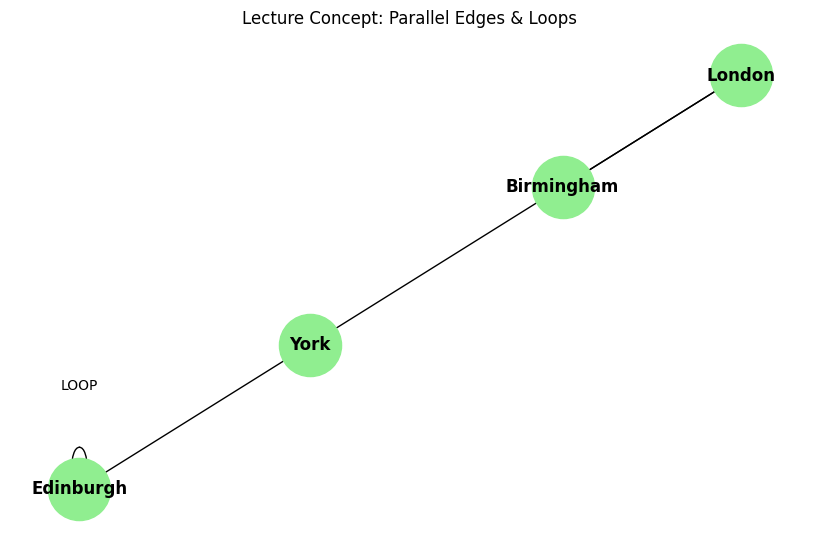

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# --- SETUP ---
# We use MultiGraph because the lecturer mentioned "Parallel Arcs" (Slide 12)
# representing redundant connections (e.g., for robustness).
G = nx.MultiGraph() 

# Adding nodes (The "Offices")
G.add_nodes_from(["London", "Birmingham", "York", "Edinburgh"])

# Adding edges (The "Connections")
edges = [
    ("London", "Birmingham"), 
    ("London", "Birmingham"), # Parallel Edge (Redundancy!)
    ("Birmingham", "York"),
    ("York", "Edinburgh"),
    ("Edinburgh", "Edinburgh") # A Loop! (Connects to self)
]
G.add_edges_from(edges)

# --- ANALYSIS (The Math) ---
print(f"Total Edges: {G.number_of_edges()}")

# LECTURE KEY POINT (Audio 7:05): The Handshaking Lemma
# "Sum of degrees == 2 * Number of Edges"
total_degree_sum = sum(d for n, d in G.degree())
print(f"Sum of all degrees: {total_degree_sum}")
print(f"2 * Total Edges:    {2 * G.number_of_edges()}")

# Check the Loop Degree (Edinburgh)
# It has 1 incoming connection from York, and 1 Loop.
# Lecture Rule: Loop adds 2. So Degree should be 1 + 2 = 3.
print(f"Degree of Edinburgh: {G.degree['Edinburgh']}")

# --- VISUALIZATION ---
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G, seed=42)

# Draw the graph
# Note: networkx visualization of MultiGraphs (curved edges) is tricky.
# This serves as a schematic view.
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={("Edinburgh", "Edinburgh"): "LOOP"})

plt.title("Lecture Concept: Parallel Edges & Loops")
plt.show()

2. SUBGRAPHS: INDUCED vs. SPANNING

- SUBGRAPHS: Just a subset of nodes/edges.
- INDUCED (Full) SUBGRAPH: Pick some nodes, and you MUST take all the original
  edges that existed between them.
- SPANNING SUBGRAPH: You keep ALL the nodes, but delete some edges (making the
  network "sparser").

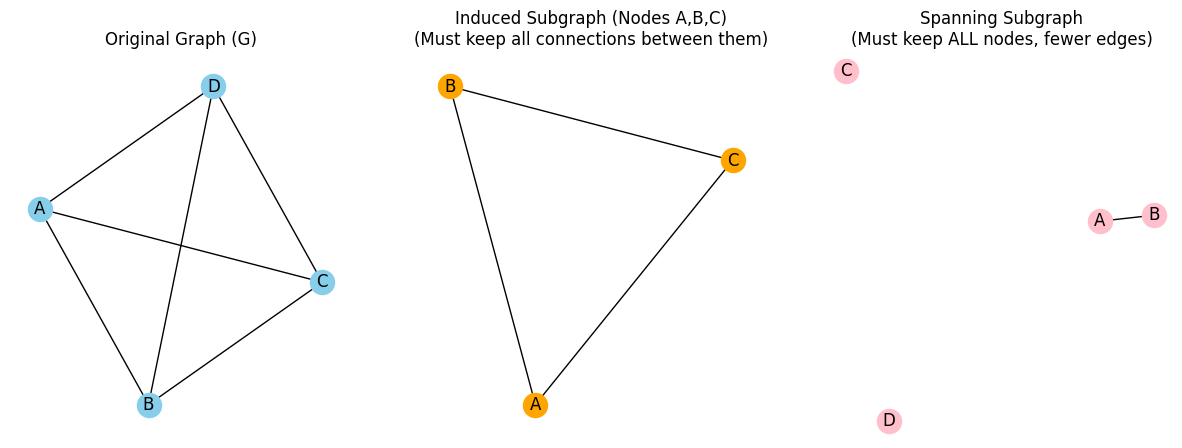

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Create the "Master" Graph (Complete Graph K4)
# Imagine 4 servers all connected to each other
G = nx.complete_graph(4) 
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
G = nx.relabel_nodes(G, mapping)

# 2. Create an INDUCED Subgraph (The "Subset" View)
# We only care about nodes A, B, and C.
# NetworkX automatically brings ALL edges between A, B, C.
induced_nodes = ['A', 'B', 'C']
H_induced = G.subgraph(induced_nodes)

# 3. Create a SPANNING Subgraph (The "Skeleton" View)
# We MUST keep all nodes (A, B, C, D), but we only keep a few wires.
H_spanning = nx.Graph()
H_spanning.add_nodes_from(G.nodes()) # Keep ALL nodes
H_spanning.add_edge("A", "B")        # Keep only one connection

# --- PLOTTING ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Original
axes[0].set_title("Original Graph (G)")
nx.draw(G, with_labels=True, node_color='skyblue', ax=axes[0])

# Plot Induced
axes[1].set_title("Induced Subgraph (Nodes A,B,C)\n(Must keep all connections between them)")
nx.draw(H_induced, with_labels=True, node_color='orange', ax=axes[1])

# Plot Spanning
axes[2].set_title("Spanning Subgraph\n(Must keep ALL nodes, fewer edges)")
nx.draw(H_spanning, with_labels=True, node_color='pink', ax=axes[2])

plt.show()

3. WHJY DO I CARE? (REAL WORLD APPLICATIONS) 

You asked how this relates to your interest. This is arguably the most important
math for modern CS.


1. AI/ML (THE "COMPUTATION GRAPH")
    - NEURAL NETWORKS: Every Neural Network is a directed graph. The "Nodes" are
      neurons (or operations), and the "Arcs" are the tensors flowing between
      them.
    - TENSORFLOW/PYTORCH: When you run `.backward()` in PyTorch, it is 
      traversing the graph in reverse to calculate gradients (Backpropagation).
    - KNOWLEDGE GRAPHS (RAG): In LLMs, "Graph RAG" is huge right now. It 
      involves storing data not just as text, but as node (Entity: "Elon Musk")
      and edges (Relation: "Owns" -> "SpaceX").


2. GAME ENGINE DEV (PATHFINDING & SCENE MANAGEMENT)
    - NavMesh: How does an NPC know how to talk from point A to B without 
      hitting a wall? The floor is divided into polygons (Nodes), and adjacent
      polygons are connected (Edges). The NPC runs a graph algorithm (A* Search)
      to find the path.
    - Scene Graphs: The relationships between objects (e.g, A "Car" object has
      "Wheel" children). If you move the Car node, the Wheel nodes move with it.


3. FEA (Finite Element Analysis) & Simulation
    - THE MESH: When you mesh a 3D part for stress testing, you are turning a
      continuous shape into a Graph.
    - NODES: The points where calculations happen.
    - EDGES: The constraints holding them together.
    - MATRIX MATH: The massive matrix you solve in FEA (Stiffness Matrix) is
      actually just a representation of this graph (an Adjacency Matrix).          

---

In [ ]:

#   F-14 Tomcat                                         _-|
#   Mike Rosulek (MJR)                                 [  |      _-|
#                                                     ]   |     [  |
#                                          _,.-'^[/-._[   |    ]   |
#                                         /     ]    ]_.-' \_  [   |
#                                       .'___   [          ' ']_.-'\_._
#                                      /     `-"     _           __'.-='^|-.
#                                     /        __.,-     __,.-='^      _/.-'
#                                   .'    _.,-'  /       \    =0= _,.-'
#                                  /  _.-'_-'  .'        /  _,.-'^
#                                 /_-'\_-'  _-'        _/-'^
#                              _-'"\_-'  _-'     _,.-'^0"0
#                             /  _-'  _-'  _,.-_^'
#                          _-'`-'    '-,='_\.-'    -MJR
#                        .'         _-'
#                       /`\     _,i|
#                      /__,|=-'^ 0"0


... focusing on the MATHEMATICAL SYNTAX and FORMAL DEFINITIONS found in the
lecture slides.



<----->
1. FORMAL DEFINITION OF A GRAPH

In CS & Maths, we don't just "draw" a graph; we define it as a specific 
mathematical structure consisting of two sets.

THE SYNTAX: A graph $G$ is defined as an ordered pair:

$$G = (N, A)$$


Where:
    - $N$ is a finite, non-empty set of NODES (Vertices).
    - $A$ is a set of ARCS (edges).


THE ARC DEFINITION: 
Each arc $a \in A$ is assosciated with an UNORDERED PAIR of nodes ${u, v}$.
    - Because the pair is unordered, the connection ${u, v}$ is the same as
      ${v, u}$. This makes the graph UNDIRECTED.
    - If the pair were ordered $(u, v)$, the graph would be DIRECTED (where
      direction matters).


EXAMPLE:
Let $G = (N, A)$ where:
    - $N = {1, 2, 3}$
    - $A = {{1, 2}, {2, 3}, {3, 1}}$

This describes a triangle shape where every node connects to every other node.




<-----------=-=-==--=-=-=-=-=-=-=-=-=>
2. ADJACENCY AND INCIDENCE

We use specific terms to describe how the sets $N$ and $A$ interact.

- ADJACENT: Two nodes $u$ and $v$ are adjacent if there is an arc connecting
  them.
    - Syntax: $u, v$ are adjacent if ${u, v} \in A$.
- INCIDENT: An arc is "incident" to a node if that node is one of its endpoints.
    - Syntax: Arc $a = {u, v}$ is incident to node u and node v.    



<<<<<<<<<<<<<<<<<ooooooooo>>>>>>>>>>>>>>>>
3. COMPLEX GRAPH FEATURES (SYNTAX)
Not all graphs are simple connections between distinct points. The syntax 
handles special cases:

  - PARALLEL ARCS (MULTI-EDGES): If the set $A$ allows multiple identical pairs
    (e.g., two copies of ${u, v}$), the graph is a MULTIGRAPH.
      - Use Case: Redundancy in a network (two cables between the same two 
        cities).
  - LOOPS: An arc that connects a node to itself.
      - Syntax: An arc $a = {u, u}$.
  - SIMPLE GRAPH: A graph that contains NO loops and NO parallel arcs.    




<[][][][][][][][][][][]>
4. DEGREES AND THE HANDSHAKING LEMMA
The "Degree" of a node is a measure of its connectivity.

DEFINITION: The degree of a node $v$, denoted as $deg(v)$, is the number of arcs
incident to it.
  - Special Rule for Loops: A loop ${v, v}$ contributes 2 to the degree of $v$
    (because it touches $v$ twice).


THE THEOREM (THE HANDSHAKING LEMMA): The sum of degrees of all nodes in a graph
is equal to twice the number of arcs.




MATHEMATICAL SYNTAX:
$$\sum_{v \in N} \deg(v) = 2 \times |A|$$

(Note: $|A|$ means the "cardinality" or count of items in set $A$.)


LOGIC PROOF: Every single arc has exactly two ends. Therefore, every arc 
contributes exactly 1 to the degree of two different nodes (or 2 to the degree
of the same node if it's a loop). When you sum up the degrees, you are counting 
every arc exactly twice.

COROLLARY: The number of nodes with an ODD DEGREE must be EVEN. (It is 
mathematically impossible to have a graph where an odd number of people have
shaken hands an odd number of times).

---

5. SUBGRAPHS

A subgraph is a "smaller" graph contained entirely within a "larger" graph.


DEFINITION:
Graph $G' = (N', A')$ is a subgraph of $G = (N, A)$ if:
    1. $N' \subseteq N$ (The nodes of $G'$ are a subset of the nodes of $G$)
    2. $A' \subseteq A$ (The arcs of $G'$ are a subset of the arcs of $G$).



TYPES OF SUBGRAPHS:

A. INDUCED (OR FULL) SUBGRAPH
You pick a subset of nodes, and you are forced to keep all valid connections
between them.
    - Syntax: Let $S \subseteq N$. The induced subgraph $G[S]$ consists of nodes
      $S$ and ALL arcs from $A$ that conenct two nodes in $S$.
    - Key Concept: You cannot "delete" an edge if both its endpoints are still
      in the graph.


B. SPANNING SUBGRAPH
You keep ALL the nodes, but you delete some edges.
    - Syntax: $G'$ is a spanning subgraph if $N' = N$.
    - Use Case: Finding a "Spanning Tree" involves keeping all cities (Nodes) 
      but removing redundant road (edges) to find the minimum wiring needed to
      connect them.




<<<<<<<>>>>>>>              
Definitions
- An (undirected) graph is a set $N$ of nodes and a set $A$ of arcs such that
  each $a \in A$ is assosciated with an unordered pair of nodes (the endpoints 
  of $a$).
- NOTATION
    - $G$
    - $nodes(G)$
    - $arcs(G)$
- A graph is simple if it has no parallel arcs and no loops.



WHY PARALLEL ARCS?
- Multiple copnnections for robustness against failures
    - Is our network robust?
    - How many failures can it tolerate before becomes disconnected?



DEGREES
- The DEGREE of a node is the number of arcs INCIDENT on it (the number of arcs
  which have that node as an endpoint   // count loops twice).
- Each arc contributes TWICE to the total of all the degrees
  - once for each endpoint.



Theorem
1. The sum of the degrees of all the nodes of a graph is twice the number of
   arcs, and therefore even.
2. The number of nodes with odd degree is even.



- Here $G_1$ is a SUBGRAPH of $G_2$:
  - $nodes(G_1) \subseteq nodes(G_2)$
  - $arcs(G_2) \subseteq arcs(G_2)$
- Of course $G_1$ and $G_2$ don't have to be drawn the same way.
  - the connectivity is what counts.



FULL AND SPANNING SUBGRAPHS
- Full (Induced) Subgraphs
  - Any subset $X \subseteq nodes(G)$ induces a subgraph $G[X]$ of $G$, where
    $G[X]$ has nodes $X$ and $G[X]$ contains all arcs of $G$ which join nodes in
    $X$.
  - $G'$ is a full (or induced) subgraph of $G' = G[X]$ for some 
    $X \subseteq nodes(G)$.   
- Spanning Subgraphs
  - If $G'$ is a subgraph of $G$ and $nodes(G') = nodes(G)$, we say that 
    $G'$ SPANS $G$.


<>:29: SyntaxWarning: invalid escape sequence '\l'
<>:50: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\l'
<>:50: SyntaxWarning: invalid escape sequence '\l'
/var/folders/z8/dvfp6ms54h96x9cpcyv6rdvr0000gp/T/ipykernel_39327/1792653650.py:29: SyntaxWarning: invalid escape sequence '\l'
  ax1.set_title("Adjacency\n(Focus: Node $\leftrightarrow$ Node relationship)")
/var/folders/z8/dvfp6ms54h96x9cpcyv6rdvr0000gp/T/ipykernel_39327/1792653650.py:50: SyntaxWarning: invalid escape sequence '\l'
  ax2.set_title("Incidence\n(Focus: Arc $\leftrightarrow$ Node relationship)")


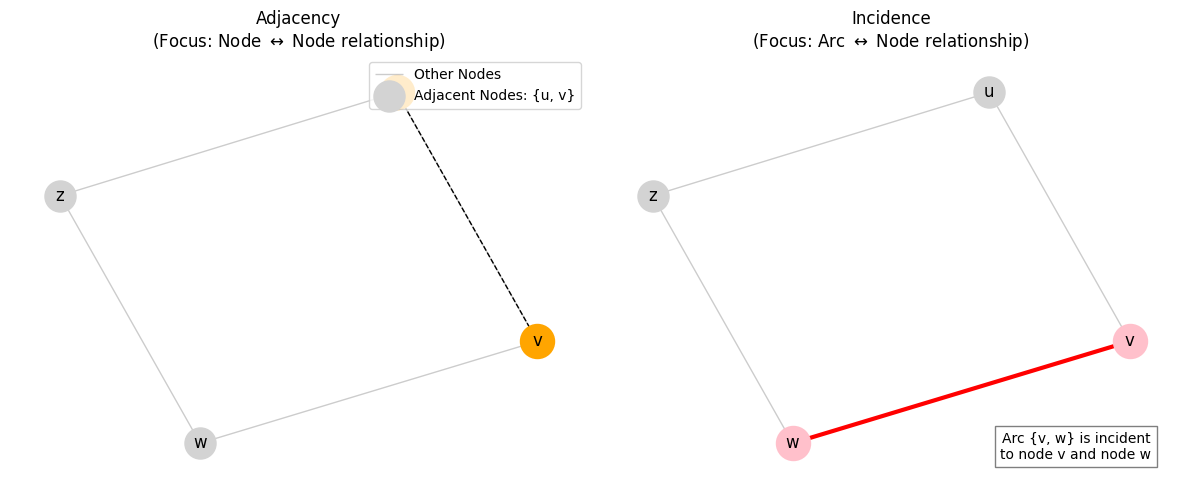

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Setup the Graph
G = nx.Graph()
G.add_nodes_from(['u', 'v', 'w', 'z'])
G.add_edges_from([('u', 'v'), ('v', 'w'), ('w', 'z'), ('u', 'z')])

# Define layout so graphs look identical in both plots
pos = nx.spring_layout(G, seed=42) 

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# --- PLOT 1: ADJACENCY ---
# Definition: u and v are adjacent if {u, v} is in Arcs.
# Visual focus: The NODES.

# Draw the base graph (faded)
nx.draw_networkx_edges(G, pos, ax=ax1, alpha=0.2)
nx.draw_networkx_nodes(G, pos, ax=ax1, node_color='lightgray', node_size=500)
nx.draw_networkx_labels(G, pos, ax=ax1)

# Highlight Adjacent Nodes (u and v)
# We highlight the nodes themselves to show the relationship exists between them
nx.draw_networkx_nodes(G, pos, nodelist=['u', 'v'], node_color='orange', node_size=600, label="Adjacent Nodes", ax=ax1)
nx.draw_networkx_edges(G, pos, edgelist=[('u', 'v')], edge_color='black', style='dashed', ax=ax1)

ax1.set_title("Adjacency\n(Focus: Node $\leftrightarrow$ Node relationship)")
ax1.legend(["Other Nodes", "Adjacent Nodes: {u, v}"], loc='upper right')
ax1.axis('off')

# --- PLOT 2: INCIDENCE ---
# Definition: Arc a = {u, v} is incident to node u.
# Visual focus: The ARC connecting to the NODE.

# Draw the base graph (faded)
nx.draw_networkx_edges(G, pos, ax=ax2, alpha=0.2)
nx.draw_networkx_nodes(G, pos, ax=ax2, node_color='lightgray', node_size=500)
nx.draw_networkx_labels(G, pos, ax=ax2)

# Highlight Incident Arc and Node
# We highlight the specific edge (arc) and the node it "touches"
target_edge = [('v', 'w')]
target_nodes = ['v', 'w']

nx.draw_networkx_edges(G, pos, edgelist=target_edge, edge_color='red', width=3, label="Arc a", ax=ax2)
nx.draw_networkx_nodes(G, pos, nodelist=target_nodes, node_color='pink', node_size=600, ax=ax2)

ax2.set_title("Incidence\n(Focus: Arc $\leftrightarrow$ Node relationship)")
# Custom legend entry for the visual
ax2.text(0.95, 0.05, "Arc {v, w} is incident\nto node v and node w", 
         transform=ax2.transAxes, ha='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
ax2.axis('off')

plt.tight_layout()
plt.show()

1. ADJACENCY (LEFT PLOT):
    - VISUAL: Nodes $u$ and $v$ are colored Orange.
    - MEANING: The property exists between the nodes. Because there is a line
      connecting them, we say "Node $u$ is adjacent to Node $v$".

2. INCIDENCE (RIGHT PLOT):
    - VISUAL: The edge (arc) ${v, w}$ is colored Red.
    - MEANING: The property connects the line to the dot. The Red Line 
      physically touches (is incident to) the Pink nodes. We say "Arc ${v, w}$
      is incident to Node $v$."       


KEY TAKEAWAY
- ADJACENCY is about neighbours (Node to Node).
- INCIDENCE is about connections (Edge to Node).


In [ ]:
#   Convair XFY-1 "Pogoplane"                      .-~-.
#   Jonathon R. Oglesbee                          /#####\
#   oglesbee@fullnet.net                          |#####|
#                                     ~~~~~~~~~~~~|#####|~~~~~~~~~~~~
#                                                 |#####|
#                                     ~~~~~~~~~~~~|#####|~~~~~~~~~~~~
#                                                /"""""""\
#                                              ,|    '    |,
#                                             / |' ' ' ' '| \
#                                            |  |   ___   |  |
#                                            |''|  |\_/|  |''|
#                                           /   | '|___| '|   \
#                                          / ' '|  |   |  | ' '\
#                                         /  '  |  |___|  |  '  \
#                                        /   '  |' |___|' |  '   \
#                                       /    '  \    '    /  '    \
#                                      /' ' ' ' '|   '   |' ' ' ' '\
#                                     /      '   |' ' ' '|   '      \
#                                    /           |   '   |  NAVY     \
#                                   /        '   |' '..''|   '        \
#                            /^\   /' ' ' ' ' ' '|   ||  |' ' ' ' ' ' '\   /^\
#                            | |  /   '          |   ||  |          '   \  | |
#                            | |_/    '          \' '||''/          '    \_| |
#                            | |      '           |  || |           '      | |
#                            | |      ' ==========|''||'|========== '      | |
#                            | |...---~~__________|  || |__________~~---...| |
#                            | |_..---~~          |__||_|          ~~---.._| |
#                            |_|||                   ||                  |||_|
#                               ||                   ||                  ||
#                               ()    jro            ()                  ()


---

In [ ]:
FRACTALFRACTALFRACTALFRACTALFRACTALFRACTCARFLATCARFLATCARFLATCARFLATCARFLATCARF
FRACTAL                        _       _                                LATCARF
FRACTAL                       |_|_    |_|_                              LATCARF
FRACTAL                    _   _|_|_   _|_|                             LATCARF
FRACTAL                   |_|_| |_| |_|_|_                              LATCARF
FRACTAL                    _|        _|_|_|    _                        LATCARF
FRACTAL                   |_        |_| |_    |_|_                      LATCARF
FRACTAL                     |_|          _|_   _|_|                     LATCARF
FRACTAL                                _|_|_|_|_|_                      LATCARF
FRACTAL                              _|_|_|_|_| |_|                     LATCARF
FRACTAL                             |_| |_|_|_                          LATCARF
FRACTAL                                  _| |_|                         LATCARF
FRACTAL                        _   _   _|_                              LATCARF
FRACTAL                      _|_|_|_|_|_|_|    _                        LATCARF
FRACTAL                     |_| |_|_|_|_|_    |_|_                      LATCARF
FRACTAL                          _|_|_|_|_|_   _|_|                     LATCARF
FRACTAL                _   _   _|_|_|_|_|_|_|_|_|_                      LATCARF
FRACTAL              _|_|_|_|_| |_|_|_| |_|_|_| |_|                     LATCARF
FRACTAL             |_| |_|_|_    |_|_    |_|_                          LATCARF
FRACTAL                  _| |_|     |_|     |_|                         LATCARF
FRACTAL                _|_                                              LATCARF
FRACTAL              _|_|_|                                             LATCARF
FRACTAL             |_| |_     _                                        LATCARF
FRACTAL                  _|_   _|                                       LATCARF
FRACTAL                 |_| |_|                                         LATCARF
FRACTAL                                                                 LATCARF
FRACTALFRACTALFRACTALFRACTALFRACTALFRACTCARFLATCARFLATCARFLATCARFLATCARFLATCARF


... to visualise the concepts exactly as they appear in your slides (Adjacency
Matrices, Lists, Isomorphism and Automorphisms).

I have also incldued a specific "EXAM STRATEGY" section at the end. Your 
lecturer dropped several strong hints in the transcript about how to solve
problems manually (which is what you usually do in exams) versus how computers
do it.



... generates three windows: one for Adjacency, one for Isomorphism, and one for
Automorphisms.

Are G and G' isomorphic? True


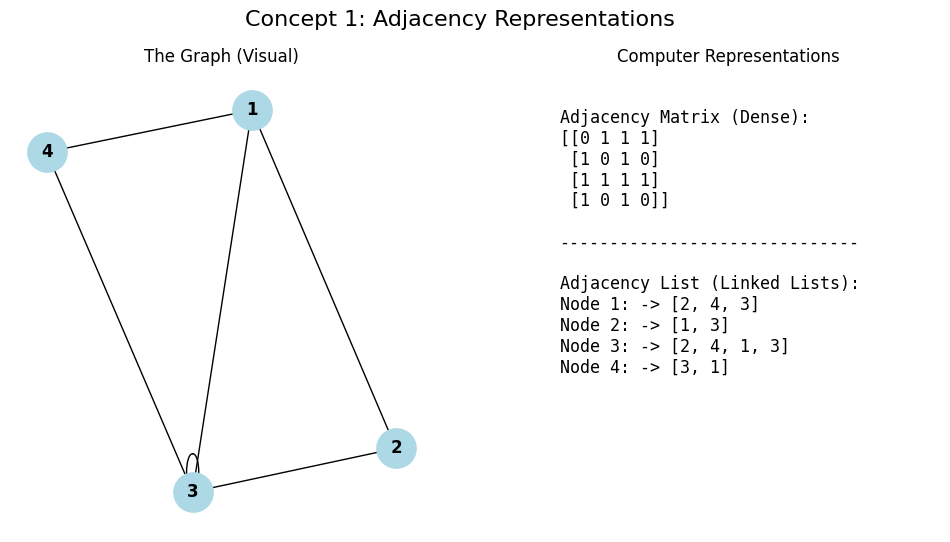

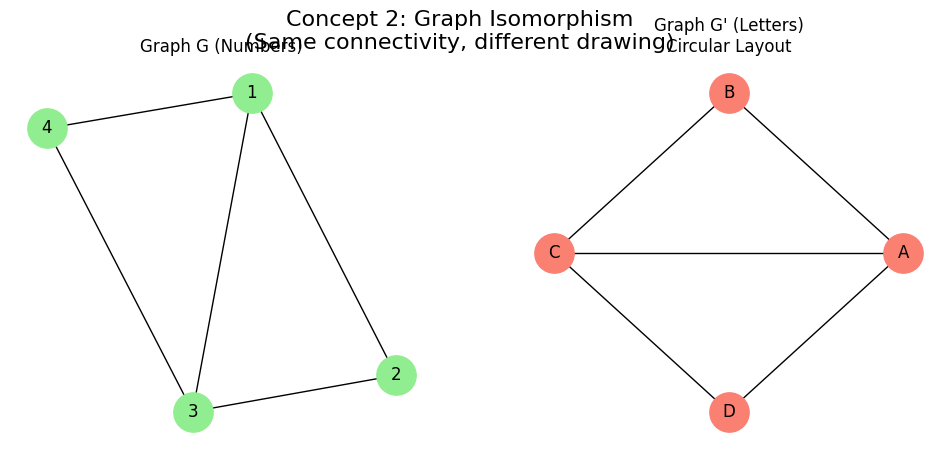

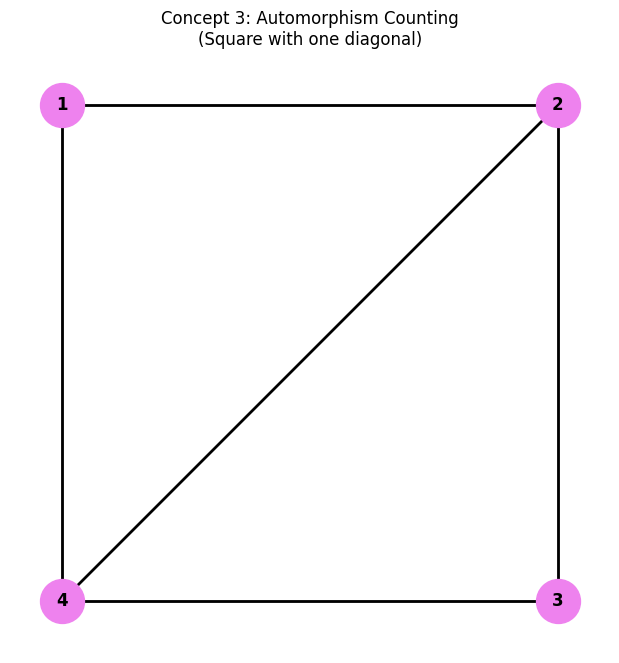

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Set a seed for consistent layout
seed = 42

def plot_adjacency_concepts():
    """
    Visualizes Adjacency Matrix vs List using the 'Kite' graph from your slides.
    """
    # 1. Create the Graph (Using MultiGraph to allow parallel edges if needed, 
    # though standard graphs often suffice for basic adjacency concepts)
    G = nx.MultiGraph()
    G.add_nodes_from([1, 2, 3, 4])
    # Adding edges matching the 'Kite' shape in your slides
    G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 3)])
    
    # Add a self-loop to node 3 (as seen in some slide examples)
    G.add_edge(3, 3)

    plt.figure(figsize=(12, 6))
    plt.suptitle("Concept 1: Adjacency Representations", fontsize=16)

    # Subplot 1: The Graph Visualization
    plt.subplot(1, 2, 1)
    pos = nx.spring_layout(G, seed=seed)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
    plt.title("The Graph (Visual)")

    # Subplot 2: The Text Representation (Matrix vs List)
    plt.subplot(1, 2, 2)
    plt.axis('off')
    
    # --- Adjacency Matrix ---
    # Convert to dense format to look like the grid in your slides
    A = nx.adjacency_matrix(G).todense()
    
    # --- Adjacency List ---
    # NetworkX returns a dictionary of dictionaries, which acts like the list of linked lists
    adj_list_str = ""
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        adj_list_str += f"Node {node}: -> {neighbors}\n"

    text_str = f"Adjacency Matrix (Dense):\n{A}\n\n"
    text_str += "-"*30 + "\n\n"
    text_str += f"Adjacency List (Linked Lists):\n{adj_list_str}"
    
    plt.text(0.1, 0.3, text_str, family='monospace', fontsize=12)
    plt.title("Computer Representations")

def plot_isomorphism():
    """
    Visualizes two graphs that LOOK different but are ISOMORPHIC.
    """
    plt.figure(figsize=(12, 5))
    plt.suptitle("Concept 2: Graph Isomorphism\n(Same connectivity, different drawing)", fontsize=16)

    # Graph 1: The "Kite"
    G1 = nx.Graph()
    G1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 3)])
    
    # Graph 2: The "Circle" (Same edges, different layout)
    G2 = nx.Graph()
    # Mapping: 1->A, 2->B, 3->C, 4->D
    G2.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A'), ('A', 'C')])

    # Draw G1
    plt.subplot(1, 2, 1)
    nx.draw(G1, nx.spring_layout(G1, seed=seed), with_labels=True, node_color='lightgreen', node_size=800)
    plt.title("Graph G (Numbers)")

    # Draw G2 (Circular layout makes it look different)
    plt.subplot(1, 2, 2)
    nx.draw(G2, nx.circular_layout(G2), with_labels=True, node_color='salmon', node_size=800)
    plt.title("Graph G' (Letters)\nCircular Layout")

    # Check Isomorphism programmatically
    # NetworkX uses the VF2 algorithm to check this efficiently
    is_iso = nx.is_isomorphic(G1, G2)
    print(f"Are G and G' isomorphic? {is_iso}")

def plot_automorphism_example():
    """
    Visualizes the 'Square with Diagonal' from the lecture for counting Automorphisms.
    """
    plt.figure(figsize=(6, 6))
    G = nx.Graph()
    # A square (1-2-3-4-1) with a diagonal (2-4)
    G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (2, 4)])
    
    pos = {1: (0, 1), 2: (1, 1), 3: (1, 0), 4: (0, 0)} # Manually setting a square shape
    
    nx.draw(G, pos, with_labels=True, node_color='violet', node_size=1000, font_weight='bold')
    nx.draw_networkx_edges(G, pos, width=2)
    
    plt.title("Concept 3: Automorphism Counting\n(Square with one diagonal)")
    plt.axis('off')

# --- Run the visualizers ---
plot_adjacency_concepts()
plot_isomorphism()
plot_automorphism_example()

plt.show()

PART 2: EXPLANATION & "LECTURER'S EXAM TIPS"

...


1. ADJACENCY MATRIX vs. ADJACENCY LIST

The lecturer draws a clear distinction between when to use which.
- THE "SPARSE" RULE:
    - THE GRAPH: If you have $n$ nodes and $m$ arcs.
    - THE MATRIX: Always take $n^2$ space. If $m$ is small (few connections),
      the matrix is full of zeros (wasted space).
    - THE LIST: Takes space proportional to $n + 2m$.
    - EXAM TIP: If a question asks which representation to use, check if the 
      graph is SPARSE ($m << n^2$). If it is sparse, argue for the ADJACENCY 
      LIST to save memory and speed up iteration.
- THE "DEGREE" TRAP IN MATRICES:
    - Standard adjacency matrices mark a 1 for connection.
    - LECTURER'S CONVENTION: For a LOOP (e.g., $C \rightarrow C$), you must put
      a 2 on the diagnol of the matrix, not a 1.
    - WHY? This ensures that summing the row equals the DEGREE of the node. If
      you put a 1, the sum is wrong. Do not miss this "2" in an exam 
      calculation.        





2. GRAPH ISOMORPHISM (ARE THESE THE SAME?)

Your lecturer admits that checking isomorphism is computationally hard ($n!$
complexity), but he suggests a workflow for humans (you) to test it.

- STEP 1: THE CHEAP CHECKS (Invariants)
    - Don't try to map nodes immediately. Count things first.
    - Do they have the same number of nodes?
    - Same number of arcs?
    - Same number of loops?
    - CRUCIAL: Do they have the same SEQUENCE OF DEGREES? (e.g., if Graph $A$ #
      has one node of degree 4, Graph $B$ must have one node of degree 4).

- STEP 2: BIJECTION
    - Only if the cheap checks pass, try to find a mapping (Bijection).
    - Map "special" nodes first (e.g., the only node with degree 4 must map to
      the only other node with degree 4).




3. COUNTING AUTOMORPHISMS (SYMMETRY)            

This was the most "technique-heavy" part of the transcript. The lecturer 
specifically warned AGAINST trying to visualise rotations and flips in your head
, because combining them is confusing.

- THE RECOMMENDED METHOD: "COMBINATORIAL / FIX-AND-COUNT"
  Instead of saying "Rotate 90 degrees," use this algorithm:
    1. PICK A NODE (e.g., Node 1): How many places can it structurally go? 
       (e.g., It has degree 2, so it must go to another node of degree 2). Let's
       say there are 2 options.
    2. FIX NODE 1: Pretend you have glued Node 1 down.
    3. PICK A NEIGHBOR (e.g., Node 2): Given that Node 1 is fixed, where can 
       Node 2 go? It must be adjacent to the new locaiton of Node 1. Count the
       options (e.g., maybe only 1 option left).
    4. MULTIPLY: Multiply the options together (e.g. $2 \times 1 \times \dots$).


- EXAMPLE FROM TRANSCRIPT 


    ...





In [ ]:
#   SR-71 Blackbird                             ,
#   Mike Rosulek (MJR)                         dMb,
#                                           ,dMMMMb,          ,,
#                                        ,dMMMMMMMMMb, eeee8888"
#                                     ,mMMm!!!!XXXXMMMMM"""
#                                   ,d!!XXMMXX88888888W"
#                                  `MX88dMM8888WWWMMMMMMb,
#                                      '""MMMMMMMMMMMMMMMMb
#                                        MMMMMMMMMMMMMMMMMMb,
#                                       dMMMMMMMMMMMMMMMMMMMMb,,
#                           _,dMMMMMMMMMMXXXX!!!!!!!!!!!!!!XXXXXMP
#                      _,dMMXX!!!!!!!!!!!!!!!!!!XXXXX888888888WWC
#                  _,dMMX!!!MMMM!!!!!!!!XXXXXX888888888888WWMMMMMb,
#                 dMMX!!!!!MMM!XXXXXX88888888888888888WWMMMMMMMMMMMb
#                dMMXXXXXX8MMMM88888888888888888WWWMMMMMMMMMMMMMMMMMb    ,d8
#                MMMMWW888888MMMMM8888888WWMMMMMMMMMMMMMMMMMMMMMMMMMMM,d88P'
#                 YMMMMMWW888888WWMMMMMMMMMMP"""'    `"YMMMMMMMMMMMXMMMMMP
#                    `""YMMMMMMMMMMMMMP""'            mMMMm!XXXXX8888888e,
#                                                   ,d!!XXMM888888888888WW
#                                                  "MX88dMM888888WWWMMMMMMb
#                                                       """```"YMMMMMMMYMMM
#                                                                  `"YMMMMM
#                                                                     `"YMP

--- The Square ---
Number of Symmetries (Automorphisms): 8
Example Symmetry (Rotation): {0: 0, 3: 1, 2: 2, 1: 3}

--- The Kite ---
Number of Symmetries: 2


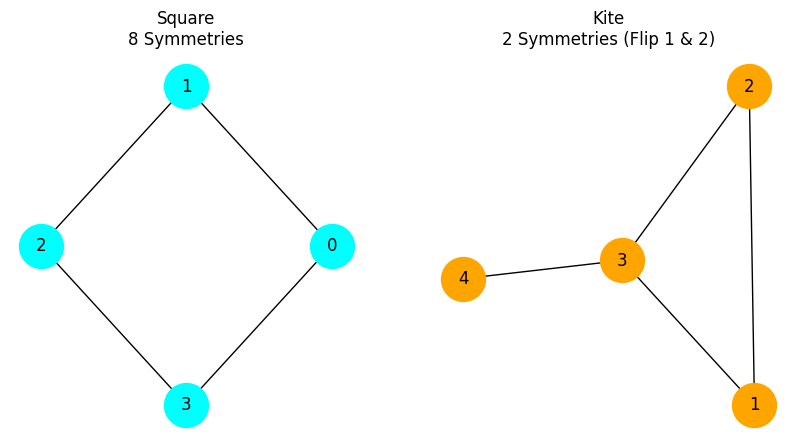

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import isomorphism

# --- CASE 1: The Square (High Symmetry) ---
# Think of a room with 4 corners. You can rotate the room, and it looks the same.
G_square = nx.cycle_graph(4) # Nodes 0-1-2-3 connected in a ring

# We calculate the "Automorphisms" (Symmetries)
# This asks: "How many ways can I scramble the labels 0,1,2,3 
# such that the connections remain EXACTLY the same?"
matcher = isomorphism.GraphMatcher(G_square, G_square)
symmetries = list(matcher.isomorphisms_iter())

print(f"--- The Square ---")
print(f"Number of Symmetries (Automorphisms): {len(symmetries)}")
print("Example Symmetry (Rotation):", symmetries[1]) 
# You might see {0:1, 1:2, 2:3, 3:0} -> This is a rotation!

# --- CASE 2: The 'Kite' (Low Symmetry) ---
# A triangle with a tail. It looks 'lopsided'.
G_kite = nx.Graph()
G_kite.add_edges_from([(1,2), (2,3), (3,1), (3,4)]) # 1-2-3 is a triangle, 4 hangs off 3

matcher_kite = isomorphism.GraphMatcher(G_kite, G_kite)
kite_symmetries = list(matcher_kite.isomorphisms_iter())

print(f"\n--- The Kite ---")
print(f"Number of Symmetries: {len(kite_symmetries)}")
# You will likely only see 2:
# 1. Do nothing (Identity)
# 2. Swap node 1 and 2 (Mirror image of the triangle part)
# Node 3 cannot move (it's the hub). Node 4 cannot move (it's the tail).

# --- VISUALIZATION ---
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Draw Square
pos_sq = nx.circular_layout(G_square)
nx.draw(G_square, pos_sq, ax=axes[0], with_labels=True, node_color='cyan', node_size=1000)
axes[0].set_title(f"Square\n{len(symmetries)} Symmetries")

# Draw Kite
pos_kite = nx.spring_layout(G_kite)
nx.draw(G_kite, pos_kite, ax=axes[1], with_labels=True, node_color='orange', node_size=1000)
axes[1].set_title(f"Kite\n{len(kite_symmetries)} Symmetries (Flip 1 & 2)")

plt.show()

This is the right approach. Seeing the nodes "swap" while the shape stays the
same is the only way to truly click with automorphism.

Here are the three specific Python labs you asked for: CHEMISTRY (BENZENE), 
SERVER RACKS (REDUNDANCY), and GRID LINES (THE "RULE").



[[[[[[[]]]]]]]
LAB 1: CHEMISTRY (BENZENE RING)

THE CONCEPT: A Benzene molecule is a ring of 6 carbons. 
THE AUTOMORPHISM: If you rotate the molecule 60 degrees, it is physically the 
    exact same molecule.
WHY IT MATTERS: In simulation, we don't need to calculate the energy for every
    single rotation. We calculate it once, and we know it applies to all 12
    symmetries (rotations and flips).    

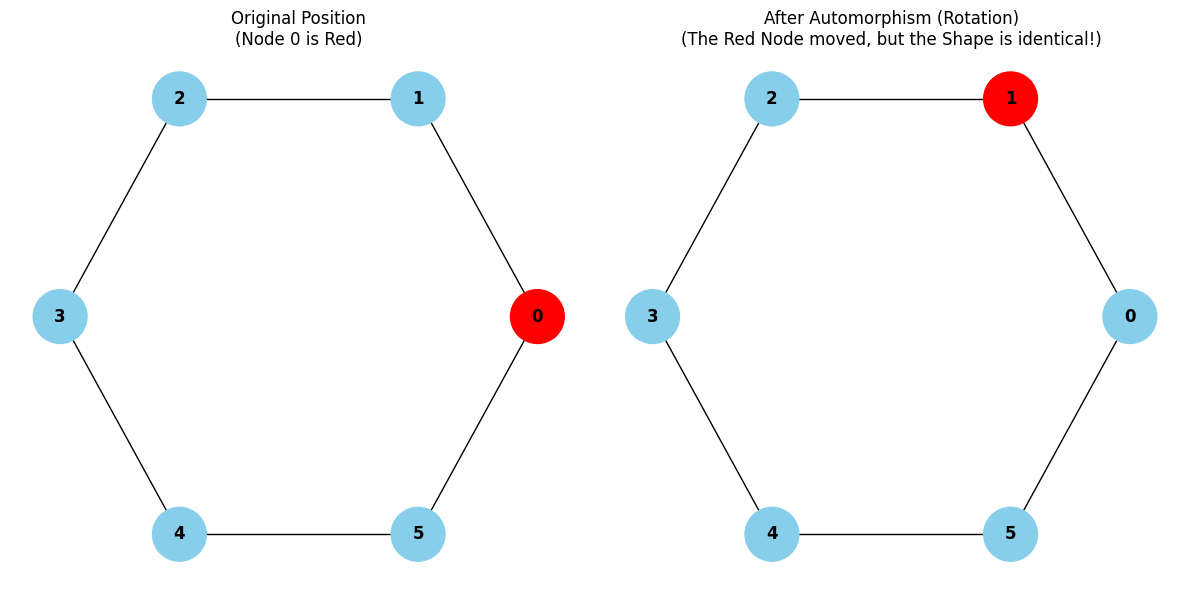

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Setup the Benzene Ring
G = nx.cycle_graph(6)

# 2. Define the Layout ONCE so the circle doesn't jitter
pos = nx.circular_layout(G)

# 3. Define the Automorphism (Rotation)
# This rule says: "Move whatever is at 0 to 1, 1 to 2, etc."
rotation_rule = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 0}

# 4. Create the "Rotated" Graph
G_rotated = nx.relabel_nodes(G, rotation_rule)

# --- VISUALIZATION ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# LEFT: Original
# Node 0 is RED.
original_red_node = 0
node_colors = ['red' if n == original_red_node else 'skyblue' for n in G.nodes()]
nx.draw(G, pos, ax=axes[0], with_labels=True, node_color=node_colors,
        node_size=1500, font_weight='bold')
axes[0].set_title("Original Position\n(Node 0 is Red)")

# RIGHT: Rotated (Automorphism)
# FIX: After relabeling, the original node 0 is now labeled as rotation_rule[0] = 1
# We need to colour the NEW label of our original red node
new_red_label = rotation_rule[original_red_node]  # 0 -> 1
node_colors_rotated = ['red' if n == new_red_label else 'skyblue' for n in G_rotated.nodes()]
nx.draw(G_rotated, pos, ax=axes[1], with_labels=True, node_color=node_colors_rotated,
        node_size=1500, font_weight='bold')
axes[1].set_title("After Automorphism (Rotation)\n(The Red Node moved, but the Shape is identical!)")

plt.tight_layout()
plt.show()

WHY THIS MATTERS:
If this were a standard "isomorphism" (comparing two different graphs), the 
shape might change completely. Because it is an AUTOMORPHISM, the Red node moved
, but the "Skeleton" of the graph fits perfectly into the exact same slot.


---<>
TOPIC: Planar Graphs


THE QUESTION: "Can I draw this graph on a piece of paper without any lines
crossing?"


WHY IT MATTERS (YOUR INTERESTS):
1. PCB Design (Hardware): You mentioned the RTX 5090. A motherboard is a "Planar
   Graph" problem. You have to route copper traces from the CPU to the RAM 
   without them touching (short circuit). If the graph isn't planar, you need a
   multi-layered PCB (which is why GPUs are expensive--they have 12+ layers to
   handle the non-planar connections!)
2. CHIP DESIGN (VLSI): Same principle inside the silicon.



---

LAB 2: SERVER RACKS (NETWORK RELIABILITY)


THE CONCEPT: You have a "Hub" server (Node 0) connected to 3 worker servers 
(Node 1, 2, 3). 

THE "NETWORK RELIABILITY" LOGIC:
    - Nodes 1, 2 and 3 are AUTOMORPHIC. They are structurally identical. If
      Server 1 melts, you can swap in Server 2, and the network topology does
      not change.
    - Node 0 is NOT automorphic to Node 1. Node 0 is the Hub. If Node 0 melts, 
      you cannot just swap Node 1 into that spot. The topology would break
      (the "Hub" would be gone).  

--- SERVER RACK RELIABILITY ---
Can I swap Worker 1 and Worker 2? True
-> YES. They are redundant. If Worker 1 fails, Worker 2 fits its slot perfectly.
Can I swap Hub 0 and Worker 1? False
-> NO. They are NOT structural matches. Hub 0 has 3 cables, Worker 1 has 1.


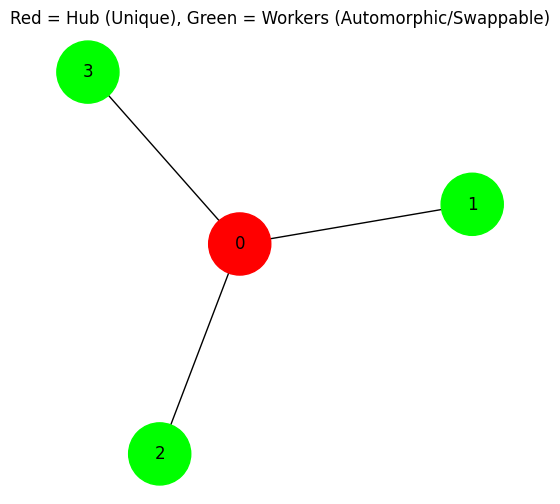

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import isomorphism

# 1. Create a "Star" Network (Hub + 3 Workers)
G_server = nx.star_graph(3) # Node 0 is center, 1,2,3 are leaves

# 2. Check specific swaps manually to prove the point

# TEST A: Can we swap Worker 1 and Worker 2? (YES)
# Mapping: 1 becomes 2, 2 becomes 1. 0 and 3 stay put.
swap_workers = {0:0, 1:2, 2:1, 3:3}
matcher_A = isomorphism.GraphMatcher(G_server, G_server)
is_valid_A = matcher_A.is_isomorphic() # This checks general isomorphism, let's verify specific map:
# A true automorphism check requires verifying edges are preserved under THIS specific mapping.
# For simplicity, let's trust NetworkX's generator:
symmetries = list(matcher_A.isomorphisms_iter())

# Let's see if our "Swap Workers" map exists in the calculated symmetries
swap_found = swap_workers in symmetries

# TEST B: Can we swap Hub 0 and Worker 1? (NO)
# Mapping: 0 becomes 1, 1 becomes 0.
swap_hub = {0:1, 1:0, 2:2, 3:3}
hub_swap_found = swap_hub in symmetries

print(f"--- SERVER RACK RELIABILITY ---")
print(f"Can I swap Worker 1 and Worker 2? {swap_found}")
print(f"-> YES. They are redundant. If Worker 1 fails, Worker 2 fits its slot perfectly.")

print(f"Can I swap Hub 0 and Worker 1? {hub_swap_found}")
print(f"-> NO. They are NOT structural matches. Hub 0 has 3 cables, Worker 1 has 1.")

# 3. Visual
fig, ax = plt.subplots(figsize=(6, 6))
pos = nx.spring_layout(G_server, seed=42)
# Color the Hub distinct from Workers to show the lack of symmetry
colors = ['red' if node == 0 else 'lime' for node in G_server.nodes()]
nx.draw(G_server, pos, with_labels=True, node_color=colors, node_size=2000)
plt.title("Red = Hub (Unique), Green = Workers (Automorphic/Swappable)")
plt.show()

---

LAB 3: THE GRID (THE "GENERATING RULE")

THE USER QUESTION: "I don't get `store the generating symmetry rule...`"

THE EXPLANATION: Imagine a $1000 \times 1000$ grid. That is 1,000,000 nodes. If
I want to describe all the symmetries (ways to flip/rotate it), I don't need to
write down a list of 1,000,000 mappings. I only need to store THE GENERATORS 
(THE RULES):
    1. RULE A: "Flip Horizontally"
    2. RULE B: "Rotate 90 degrees"

By combining these two rules (Flip then Rotate, or Rotate then Rotate), I can
generate every possible symmetry of the grid. This is "Group Theory" (the math
behind the graphs).    

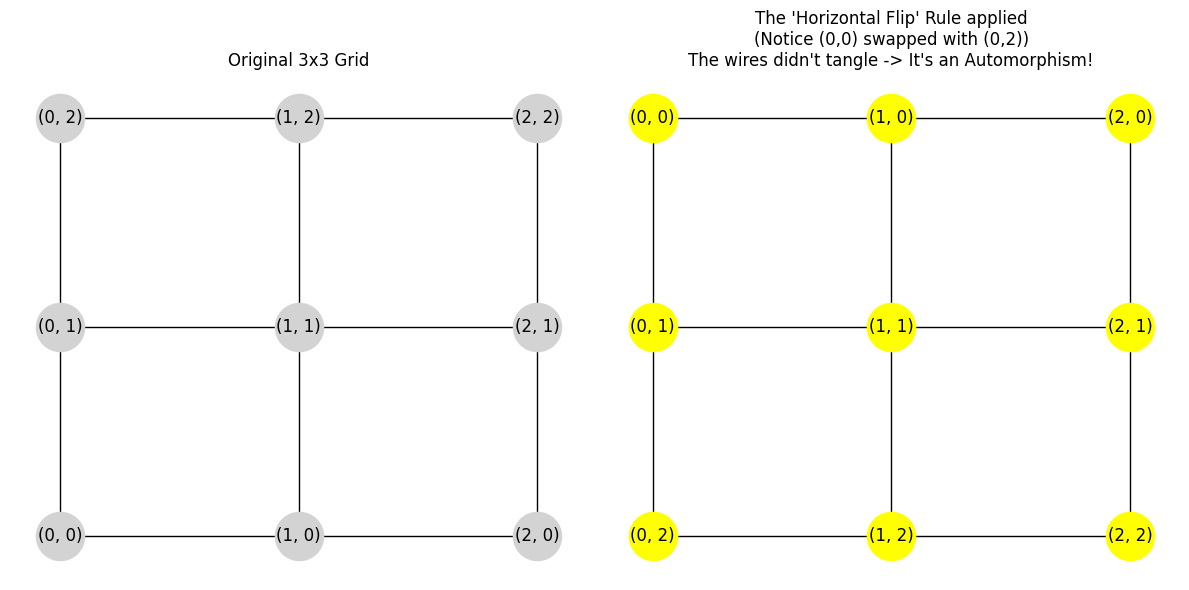

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Create a 3x3 Grid
G_grid = nx.grid_2d_graph(3, 3)

# 2. Define a "Generating Rule": Horizontal Flip
# Mathematical Logic: (x, y) -> (x, 2-y) (flipping the y-axis index)
def horizontal_flip(node):
    x, y = node
    return (x, 2 - y)

# Apply the rule to create the mapping
mapping = {node: horizontal_flip(node) for node in G_grid.nodes()}

# 3. Visualization of the "Flip Rule"
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original
pos = {n: n for n in G_grid.nodes()}
nx.draw(G_grid, pos, ax=axes[0], with_labels=True, node_color='lightgray', node_size=1200)
axes[0].set_title("Original 3x3 Grid")

# Flipped (Automorphism)
G_flipped = nx.relabel_nodes(G_grid, mapping)

# KEY FIX: Draw each node at its ORIGINAL position, not its new label position
# The inverse mapping tells us: for each new label, where did it come from?
inverse_mapping = {v: k for k, v in mapping.items()}
pos_flipped = {node: inverse_mapping[node] for node in G_flipped.nodes()}

nx.draw(G_flipped, pos_flipped, ax=axes[1], with_labels=True, node_color='yellow', node_size=1200)
axes[1].set_title("The 'Horizontal Flip' Rule applied\n(Notice (0,0) swapped with (0,2))\nThe wires didn't tangle -> It's an Automorphism!")

plt.tight_layout()
plt.show()

SUMMARY:

1. ISOMERS (BENZENE): Automorphism = ROTATION. Since the graph looks the same
   rotated, the molecule is symmetric.
2. SERVER RACKS: Automorphism = SWAPPABILITY. If two nodes can be swapped 
   without breaking the graph structure, they perform the exact same role (high
   redundancy).
3. GENERATING RULE: Instead of listing every single node change, we just code
   the math operation (e.g., "Flip X axis"). If that operation preserves the
   connections, it's a valid symmetry rule.      

---

In [ ]:
         @\_______/@
        @|XXXXXXXX |
       @ |X||    X |
      @  |X||    X |
     @   |XXXXXXXX |
    @    |X||    X |             V
   @     |X||   .X |
  @      |X||.  .X |                      V
 @      |%XXXXXXXX%||
@       |X||  . . X||
        |X||   .. X||                               @     @
        |X||  .   X||.                              ||====%
        |X|| .    X|| .                             ||    %
        |X||.     X||   .                           ||====%
       |XXXXXXXXXXXX||     .                        ||    %
       |XXXXXXXXXXXX||         .                 .  ||====% .
       |XX|        X||                .        .    ||    %  .
       |XX|        X||                   .          ||====%   .
       |XX|        X||              .          .    ||    %     .
       |XX|======= X||============================+ || .. %  ........
===== /            X||                              ||    %
                   X||           /)                 ||    %
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


...
Here is the "Aha!" moment to clear that up: AUTOMORPHISM IS JUST A FANCY
MATHEMATICIAN WORD FOR S Y M M E T R Y.


1. THE DISTINCTION (ISOMORPHISM vs. AUTOMORPHISM)
    - ISOMORPHISM ($G_1 \cong G_2$):
      You are asking, "Are these TWO DIFFERENT drawings actually the SAME 
      object?"
      - Analogy: You have a photo of a hand and a photo of a glove. Are they the
        "same" shape? YES.

    - AUTOMORPHISM ($G \cong G$):
      You are asking, "If I rotate or flip this ONE object, does it look exactly
      the same?"
      - Analogy: Look at a perfect Square. If you rotate it 90 degrees, it looks
        identical. That rotation is an Automorphism.
      - The "Counterexample" feeling: You feel like if you move nodes, it must
        change the graph. But for highly symmetric graphs (like a ring or a star
        ), there are specific swaps you can do where the connections DON'T 
        CHANGE.



2. WHY IS THIS USEFUL? (THE "POINT")

If a graph has many automorphisms, it is SYMMETRIC. If it has one (the "do 
nothing" identity), it is ASYMMETRIC.


REAL WORLD USE CASE:
    1. CHEMISTRY (ISOMERS): This is huge in drug discovery. A benzene ring is a 
       graph of Carbon atoms. It ha automorphisms (you can rotate the ring). If
       you replace one Carbon with Nitrogen, you break the symmetry. Algorithms
       use automorphism groups to count how many distinct molecules can be
       formed.
    2. NETWORK RELIABILITY: In a server cluster, if Server A and Server B are
       "automorphic", they are structurally identical. If Server A fails, Server
       B is a perfect mathematical substitute. If they are not automorphic, 
       Server B might be in a more critical "bridge" position than A.
    3. GRAPH COMPRESSION: If I know you graph is a grid (highly symmetric), I
       don't need to store every single connection. I just need to store the
       "generating" symmetry rule.





...





4. ADDRESSING YOUR "COUNTEREXAMPLE" SUSPICION

You likely feel that if you swap Node 1 and Node 2, the graph must be different
because Node 1 is now where Node 2 was.
    - THE COUNTER-INTUITION: In the "Kite" example code above, look at Nodes 1
      and 2. They both connect to each other, and they both connect to Node 3.
    - THE TEST: If I close my eyes, and you swap Node 1 and Node 2, can I tell
      you did it just by looking at the connections? NO.
    - That is why it is an AUTOMORPHISM.
    - However, if you swapped Node 3 (the hub) and Node 4 (the tail), I COULD
      tell. Node 4 only has 1 connection; Node 3 has 3. Swapping them breaks
      the structure. That is NOT an automorphism.



---

In [ ]:
                            O         O
.  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .
   .    .    .    .    .    .    .    .    .    .    .    .    .
   .     .     .     .     .     .     .     .     .     .     .
     .      .      .      .      .      .      .      .      .
 .       .       .       .       .       .       .       .       .
      .        .        .        .        .        .        .
   .         .         .         .         .         .         .
.          .          .          .          .          .          .
|          |          |          |          |          |          |
|          |          |          |          |          |          |
|          |          |          |          |          |          |
   .         .         .         .         .         .         .
      .        .        .        .        .        .        .
 .       .       .       .       .       .       .       .       .
     .      .      .      .      .      .      .      .      .
   .     .     .     .     .     .     .     .     .     .     .
   .    .    .    .    .    .    .    .    .    .    .    .    .
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .
.  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .


---

... written explanations for GRAPH ISOMORPHISM and AUTOMORPHISMS, broken down
with a specific focus on the mathematical syntax and the step-by-step logic ...



PART 2: GRAPH ISOMORPHISM

DEFINITION: Two graphs, $G$ and $G'$, are ISOMORPHIC if they have the exact same
structure (same number of nodes connected in the same way), even if they are
drawn differently or have different labels.


MATHEMATICAL SYNTAX
To prove two graphs are isomorphic, we must define a BIJECTION (a one-to-one and
onto mapping). We need two functions:


1. $f : nodes(G) \rightarrow nodes(G')$
    - This reads as: "A function $f$ that maps every node in Graph $G$ to a 
      unique node in Graph $G'$."
2. $g : arcs(G) \rightarrow arcs(G')$
    - This reads as: "A function $g$ that maps every arc in Graph $G$ to a
      unique arc in Graph $G'$."


THE CONDITION (PRESERVING CONNECTIVITY)
The mapping must preserve who is connected to whom.
    - SYNTAX: If an arc $a$ in $G$ connects endpoints $n_1$ and $n_2$, then the
      mapped arc $g(a)$ must connect the mapped endpoints $f(n_1)$ and $f(n_2)$.
    - IN SIMPLE TERMS: If Node 1 is neighbours with Node 2 in the first graph,
      then the "new" Node 1 must be neighbors with the "new" Node 2 in the 
      second graph,



HOW TO CHECK FOR ISOMORPHISM (The Procedure)

1. CHECK INVARIANTS (THE "CHEAP" CHECKS):
Before doing the hard work of finding a map, check properties that cannot change
. If any of these differ, the graphs are NOT isomorphic.
    - Number of nodes ($|V|$).
    - Number of arcs ($|A|$).
    - Number of loops.
    - DEGREE SEQUENCE: (e.g., if Graph 1 has a node of degree 4, Graph 2 must
      also have a node of degree 4).

2. FIND THE BIJECTION (The Mapping):
If the invariants match, try to map the nodes.
    - Example: In your "Kite" example, Node 3 (degree 4) must map to Node D
      (degree 4). Node 1 (degree 2) must map to Node B (degree 2).

3. MATRIX VERIFICATION: You can prove isomorphism rigorously using Adjacency
   Matrices.
   - If you reorder the rows and columns of Graph 2's matrix to match the order
     of your mapping, the two matrices must be identical.            


---

PART 3: AUTOMORPHISMS


DEFINITION
An AUTOMORPHISM is a special type of isomorphism where you map a graph $G$ to
ITSELF ($G \rightarrow G$). It essentially measures the SYMMETRY of the graph.


MATHEMATICAL SYNTAX
- It is a bijection $f : V \rightarrow V$ s.t. if ${u, v}$ is an edge, then 
  ${f(u), f(v)}$ is also an edge.
- The set of all automorphisms form a group (though your slides don't dwell
  heavily on group theory yet, just the counting).


HOW TO COUNT AUTOMORPHISMS (THE "Fix-and-Count" Method)
Your lecturer advises against trying to visualise rotations and flips purely in
your head. Instead use a combinatorial method....


....


....





<--------[[][][][][][][][]]>
CLARIFICATION on MATHEMATICAL SYMBOLS USED

- $V$ or $N$: The set of Nodes (Vertices).
- $A$ or $E$: The set of Arcs (Edges).
- $|V|$: The "size" or "order" of the graph (number of nodes).
- $n!$ (FACTORIAL): $n \times (n - 1) \times \dots \times 1$. Used to describe
  the huge number of ways to rearrange a matrix.
- $O(n^k)$ (BIG-O NOTATION): Describes the "worst-case" complexity:
    ...





------------[[][][][][][][][]]
In general, discoverying whether two graphs are isomorphic has quite a HIGH
COMPLEXITY.

We need to see whether the adjacency matrices are rearrangements of each other.

There are n! arrangements if there are n nodes.

This is worse than exponential ($2^n$).


In [ ]:
                            O         O
.  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .
   .    .    .    .    .    .    .    .    .    .    .    .    .
   .     .     .     .     .     .     .     .     .     .     .
     .      .      .      .      .      .      .      .      .
 .       .       .       .       .       .       .       .       .
      .        .        .        .        .        .        .
   .         .         .         .         .         .         .
.          .          .          .          .          .          .
|          |          |          |          |          |          |
|          |          |          |          |          |          |
|          |          |          |          |          |          |
   .         .         .         .         .         .         .
      .        .        .        .        .        .        .
 .       .       .       .       .       .       .       .       .
     .      .      .      .      .      .      .      .      .
   .     .     .     .     .     .     .     .     .     .     .
   .    .    .    .    .    .    .    .    .    .    .    .    .
 .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .
.  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .


... breakdown of ... (Planar Graphs, Coloring, Bipartite Graphs) with the
requested Python code, exam tips, and real-world applications.



1. CONCEPTS EXPLAINED

A. PLANAR GRAPH & EULER'S FORMULA
    - THE CONCEPT: A graph is PLANAR if you can draw it on a piece of paper such
      that NO EDGES CROSS.
        - Note: Just because a graph is drawn with crossings (like 3D cube drawn
          on 2D paper) doesn't men it's non-planar. If you can move the nodes 
          around to untangle it, it is planar.#
    - The NON-PLANAR VILLAINS:
        - $K_5$: The complete graph on 5 nodes (Star in a pentagon). You cannot
          draw this without a crossing.
        - $K_{3,3}$: The "Utilities Problem" (3 houses, 3 utilities). You cannot
          connect them all without crossing lines.
                <-- $K_{3,3}$ is the COMPLETE BIPARTITE GRAPH on two sets of 3
                    nodes.
        - KURATOWSKI'S THEOREM: Any non-planar graph basically hides a $K_5$ or
          $K_{3,3}$ inside it.
          


[[[[
    Kuratowkski's Theorem

    It turns out that any non-planar graph contains $K_5$ or $K_{3,3}$ as a 
    subgraph, in a sense.

    Two graphs are HOMEOMORPHIC if they can both be obtained from the same graph
    by a series of operations where an arc $x - y$ is replaced by two arcs
    $x - z - y$.



    THEOREM <-- A graph is planar iff it does not contaoin a subgraph 
                homeomorphic to $K_5$ or $K_{3,3}$.
]]]]          


    - Euler's Formula: For any connected planar graph:

    $$F = A - N + 2$$
    (Faces = Arcs - nodes + 2).

    - IMPORTANT: The "Outside" of the graph counts as a face!



B. GRAPH COLORING & MAPS
    - THE CONCEPT: Coloring a graph means assigning a color to every node so 
      that NO TWO NEIGHBORS SHARE THE SAME COLOR.
    - THE MAP CONNECTION: Coloring a map (countries) is the same as coloring its
      "Dual Graph" (where every country becomes a node).
    - FOUR COLOR THEOREM: Every single planar map (or graph) can be colored with
      at most 4 COLORS.
    - 2-COLORBALE = BIPARTITE: If you only need 2 colors, the graph is 
      "Bipartite".



C. BIPARTITE GRAPHS
    - THE CONCEPT: You can split the nodes into two teams (Set X and Set Y). 
      Edges ONLY go between teams, never within a team.
    - THE "HIDDEN" BIPARTITE: The Cube graph is actually bipartite! You can
      color its corners Black/White s.t. Black only touches white.        







<<<<<<<<<<<<<<[[[[[[[[[[{{{{{{{{{{{}}}}}}}}}}}]]]]]]]]]]>>>>>>>>>>>>>>
3. EXAM STRATEGY: WHAT THE LECTURER WANTS YOU TO KNOW

... here are the traps your lecturer will likely set in an exam:



A. THE "DRAWING" TRAP
    - THE TRAP: They will give you a graph that looks like a tangled mess with
      lines crossing everywhere (like the Cube drawn in 3D perspective). They
      will ask "is this graph planar?"
    - THE MISTAKE: Saying "No, because lines cross."
    - THE SOLUTION: You must verify if it can be redrawn.
        - Check: Does it contain a "hidden" $K_5$ or $K_{3,3}$? If not, it's
          likely plnar.
        - Check: Euler's Formula, If $F = A - N + 2$ fails, it might not be 
          planar (or you counted faces wrong).


B. COUNTING FACES (EULER'S FORMULA)
    - THE TRAP: When applying $F = A - N + 2$, students often forget the 
      "outside" region.
    - THE SOLUTION: Always count the "infinite face" surrounding the graph as 1
      face.
        - EXAMPLE: A single triangle has 2 faces: the one inside the triangle,
          and the one outside it.


C. BIPARTITE RECOGNITION
    - THE TRAP: They will ask "What is the chromatic number of this graph?" 
      (i.e., min colors needed).
    - THE HINT: If you suspect it's 2, check if it is BIPARTITE.
    - THE TIP: Look for CYCLES OF ODD LENGTH (e.g., a triangle).
        - RULE: If a graph contains a triangle (length 3), it CANNOT be 
          bipartite (needs 3 colors).
        - RULE: If a graph has NO odd cycles, it IS bipartite (needs 2 colors).



<------------->
4. APPLICATIONS in AI, Game Dev, & Engineering

Here is how these "abstract" concepts power the tech you are interested in:


I. GAME ENGINE DEV: NAVIGATING MESHES (NavMesh)
    - CONCEPT: Planar Graphs / Dual Graphs
    - APPLICATION: In games (Unity/Unreal), the floor is divided into polygons
      (a planar graph). AI characeters (NPCs) don't walk on pixels; they walk
      on the "Dual Graph" of these polygons.
    - WHY? Pathfining (A*) is much faster on a graph of 50 connected polygons
      than on a grid of 1 million pixels.


II. FEA (Finite Element Analaysis) SIMULATION        
    - CONCEPT: Planar Graphs & Meshing
    - APPLICATION: When simulating stress on a car part, you divide the 3D 
      object into tiny triangles or tetrahedra (Meshing).
    - WHY? A surface mesh is essentially a PLANAR GRAPH wrapped around a 3D 
      object. Euler's formula is actually used to validate that the mesh is
      "watertight" (no holes or broken geometry) before running the physics sim.



...

Hardware chip design ... minimising non-planar crossings = cheaper, faster CPUs.




--------;;';';';';';'';

PART 5: GRAPH COLORING & BIPARTITE GRAPHS


1. GRAPH COLORING
Coloring a graph involves assigning a value (color) to every node s.t. adjacent
nodes (neighbours) have different values.
    - SYNTAX: A graph is $k$-COLOURABLE if its nodes can be colored using at 
      most $k$ distinct colours.
    - THE DUAL GRAPH APPLICATION: To color a map (countries), we convert it to
      a DUAL GRAPH where:
        - Countries --> Nodes
        - Shared borders --> Arcs
        - The problem of map coloring is mathematically identical to finding the
          chromatic number of this planar dual graph.  


2. THE FOUR COLOUR THEOREM
    - STATEMENT: Every SIMPLE PLANAR GRAPH is 4-colourable.
    - IMPLICATION: No matter how complex a planar map or circuit is, you never
      need more than 4 colors to separate adjacent regions.


3. BIPARTITE GRAPHS
   A specific class of graphs that can be split into two distinct groups.
    - MATHEMATICAL DEFINITION: A graph $G$ is BIPARTITE if the set of nodes $V$
      can be partitioned into two disjoint sets, $X$ and $Y$ (where 
      $X \cup Y = V$ and $X \cap Y = \emptyset$), s.t.:
        - No two nodes in set $X$ are joined by an arc.
        - No two nodes in set $Y$ are joined by an arc.
        - All arcs connect a node in $X$ to a node in $Y$.

    - THE "2-COLOURABLE" PROPOSITION:
            $$G is bipartite \Longleftrightarrow G is 2-colourable$$

        - Explanation: If you color all nodes in set X "Blue" and all nodes in 
          set $Y$ "Green", the condition of being bipartite guarantees that no 
          two Blue nodes touch and no two Green nodes touch. Therefore, it is
          validly 2-colored.

    - EXAMPLE (The Cube):
      The Cube graph is bipartite. Although it looks like a single block, you
      can color the corners Black and White s.t. every edge connects a Black 
      corner to a White corner.                     

---

are you sure this sentence is correct?

cuz then i can literally max k to +inf???
----/
Syntax: A graph is $k$-colourable if its nodes can be colored using at most $k$ distinct colors.


<<<<<<<<<<<<<<<<<<[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]>>>>>>>>>>>>>>>>>>
... Technically, the sentence is CORRECT, and your observation that you can "max
$k$ to $\infty$" is also TRUE. If a graph can be coloured with 3 colours, it can
obviously be coloured with 100 colours (you just don't use 97 of them).

However, in graph theory, we distinguish between two things to avoid this 
"infinity" confusion:



1. $k$-colourable (THE PROPERTY):

    - This is just a "Yes/No" question. "Can I color this with $k$ colours?"
    - As you noted, if a graph is 3-colourable, it is automatically 4-colourable
      , 5-colourable, and 1,000,000-colourable.
    - WHY USE THIS DEFINITION? It makes theorems easier to state. For example, 
      the FOUR COLOUR THEOREM states "Every planar graph is 4-colourable." This
      implicitly means 4 is enough. It doesn't ban you from using 5, but the
      theorem is telling you that 4 is the upper bound on what you need.  


2. THE Chromatic Number (THE MINIMUM):

    - This is the specific value you are actually looking for.
    - DEFINITION: The smallest possible value of $k$ for which the graph is 
      $k$-colourable.
    - NOTATION: $\chi(G)$ (Chi).
    - If $\chi(G) = 3$, then the graph is 3-colourable (and 4, 5... $\infty$),
      but it is NOT 2-colourable.




SUMMARY
    - "Is it $k$-colourable?": Means "Is $k$ SUFFICIENT?"
        (Yes, you can have extra unused colours).
    - "WHAT IS THE CHROMATIC NUMBER?": Means "What is the MINIMUM colors 
                                              required."    


    Your lecturer uses the standard definition in Slide 41:
        "A graph $G$ is $k$-colourable if the nodes of $G$ can be coloured using
        NO MORE THAN $k$ colours."

    So, while you could say a triangle is 100-colourable, on an exam, you are
    almost always interested in finding the SMALLEST $k$ (the Chromatic Number).    






<<<<<<<<<<>>>>>>>>>>
    THE DUAL GRAPH

    We can turn a map into a planar graph by letting the countries be the nodes,
    and joining them if they are neighbours on the map.

    This graph is called the DUAL GRAPH.


    The problem now is to colour the nodes of a planar graph in such a way that
    if two nodes are adjacent then they have different colours.



<<<<<<<<>>>>>>>>
    MAPS and SIMPLE PLANAR GRAPHS
        - Dual graphs of maps are always simple and planar.
        - Conversely, any simple planar graph is the dual graph of sopme map.



            "No more than $k$" means $\le k$ (Less than or equal to $k$).



In [ ]:
 ____________________          ____________________
|                    |   ____ |                    |
|  CAN  YOU GIVE ME  |  /    \I  -BUT I CAN ADD A  |
|  ONE GOOD  REASON  | (  NO     PITCHFORK  AND A  |  /\
|  WHY I SHOULD LET  |  \____/I  TAIL TO THAT "GO  | (  )
|  YOU IN?           |        |  TO HELL" ICON.    | _)(_     _
|_______________ .___|        |_____. _____________|~ __ ~-._ \"~-.
                \|                  |/    (_ /~,^ .r~T  T~i. ^.~\ _)
                 `                  '      \ \/ ,^|| |  | ||^. \/ /
              _____                ___ _    Y  /  || |[]| ||  \  Y
   .--.     .^  ,^^\.-.           {___~ )   | Y   || |  | ||   Y |
  / __ \   / ) / -- )_ \           c|..^o   | |   || |[]| ||   | |
 / ( (\ \ /(   ) ,>.| ) \           |c_,|  <| |===||=|  |=||===| |>
  ( ( (\ Y  __ (/ o Y).--^-------.   )_/l  <| |===||=|[]|=||===| |>
   ( ( (\l)/  \    )I | [~~~~~~~\|   `--.\---x.   || |  | ||   | |
 (  ( ( (|Y    Y (  |\| | \ _____\__ _ _/r~)  )\_ ||_|[]|_||_ _| |  _.
   ( \ \ ||    |____>-| |  T   = |.__\\<\`^  ", \~|| |  | || ~ | |"~
  \   \ (\|  '~~ Y____|_I__l_n___|_  / `---c~~^. Y'~^|_.^"`|_.-^-|__,-~
 ( \ ( ( (|      | | |   [=o H .=.]_ `-I~T~Y     |-          __
    ( \ \ l      | | l___[___H____] ~"_| | |    ,t     __  "~  ~"
   \ ( \ \I\     | |[_________H____] / | l_j_.-T |--"~~  ~"-.__,.--"~
    \ \ \ ||`----^-' :\_______H__/   \/|       | |-.._
     (   \|;     :   | |.. .. H.|^,__.-|   :   : |_   _.--~~"--..
        \ |   _  l _ : ||| || H||   __ !   |   ' l "~"  -Row ._  _.-"
         _|,-' ~"-' ~-.L|^.||_H|^-"~  ~"-.    ._  \_.-"~-.__   "~
       "~     ._   __,--.__~~     ~-._     _.   "~~         ~~~"
                ~~"        ~~"        "~~~"



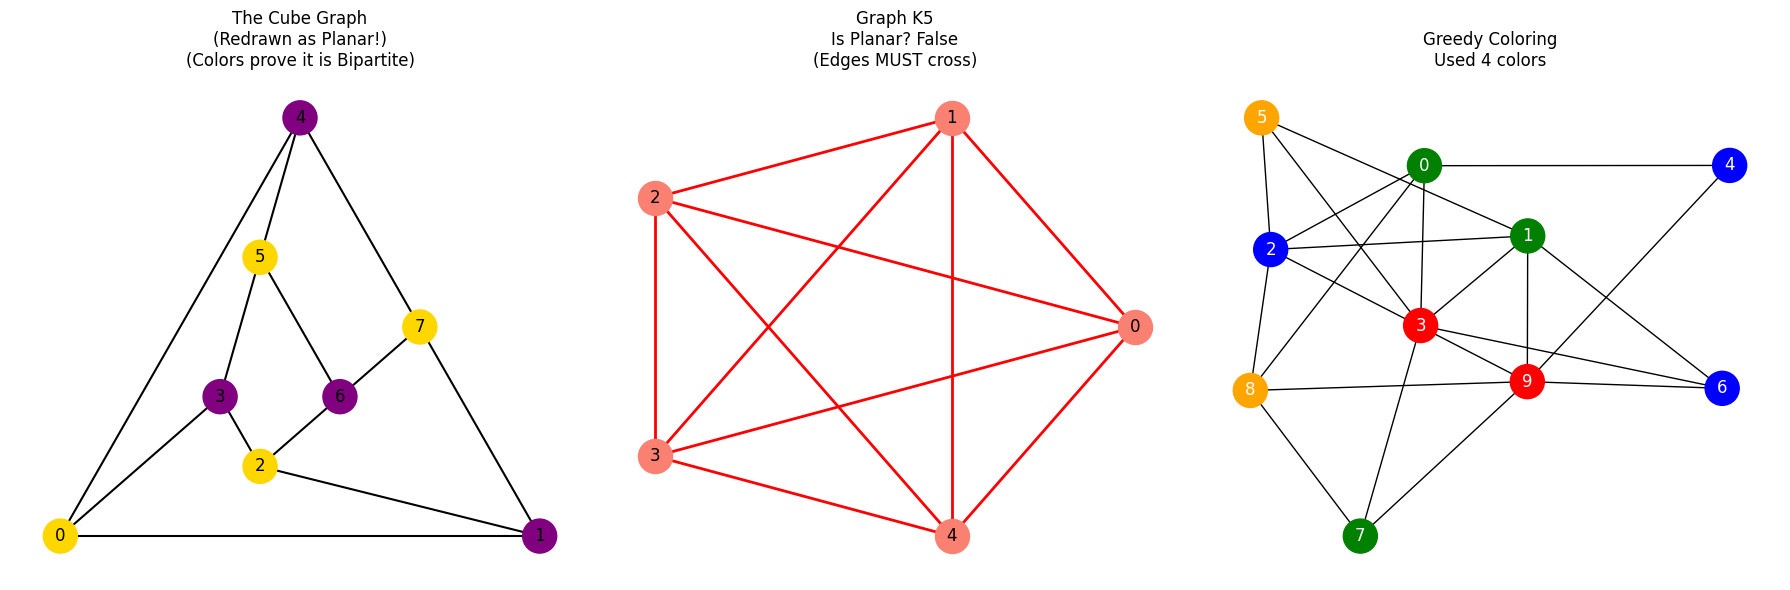

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_planar_and_coloring():
    # Setup the figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # --- 1. THE CUBE (Hidden Planar & Bipartite) ---
    # The lecturer explicitly mentioned the Cube is planar AND bipartite.
    # Let's prove it visually.
    G_cube = nx.cubical_graph()
    
    # Check Planarity programmatically
    is_planar, embedding = nx.check_planarity(G_cube)
    
    # Layout: Use the planar layout if possible, otherwise spring
    if is_planar:
        pos_cube = nx.combinatorial_embedding_to_pos(embedding)
        title_1 = "The Cube Graph\n(Redrawn as Planar!)"
    else:
        pos_cube = nx.spring_layout(G_cube)
        title_1 = "The Cube Graph"

    # Color it Bipartite (2-color)
    # NetworkX has a dedicated bipartite color algorithm
    color_map = nx.bipartite.color(G_cube) # Returns {node: 0 or 1}
    node_colors = ['gold' if color_map[n]==1 else 'purple' for n in G_cube.nodes()]

    nx.draw(G_cube, pos_cube, ax=axes[0], with_labels=True, 
            node_color=node_colors, node_size=600, edge_color='black', width=1.5)
    axes[0].set_title(f"{title_1}\n(Colors prove it is Bipartite)", fontsize=12)


    # --- 2. K5 (The Non-Planar Villain) ---
    # The complete graph on 5 nodes
    G_k5 = nx.complete_graph(5)
    
    # Try to check planarity
    is_k5_planar, _ = nx.check_planarity(G_k5)
    
    nx.draw(G_k5, nx.circular_layout(G_k5), ax=axes[1], with_labels=True, 
            node_color='salmon', node_size=600, edge_color='red', width=2)
    axes[1].set_title(f"Graph K5\nIs Planar? {is_k5_planar}\n(Edges MUST cross)", fontsize=12)


    # --- 3. GRAPH COLORING (Greedy Algorithm) ---
    # Let's make a random planar-ish graph and color it
    G_rand = nx.erdos_renyi_graph(10, 0.4, seed=42)
    
    # Use greedy coloring algorithm
    # Strategies: 'largest_first' often uses fewer colors
    greedy_colors = nx.coloring.greedy_color(G_rand, strategy='largest_first')
    # greedy_colors is a dict {node: color_index}
    
    # Map indices to actual colors
    palette = ['red', 'green', 'blue', 'orange', 'cyan']
    final_colors = [palette[greedy_colors[n]] for n in G_rand.nodes()]
    
    pos_rand = nx.spring_layout(G_rand, seed=42)
    nx.draw(G_rand, pos_rand, ax=axes[2], with_labels=True, 
            node_color=final_colors, node_size=600, font_color='white')
    
    num_colors_used = max(greedy_colors.values()) + 1
    axes[2].set_title(f"Greedy Coloring\nUsed {num_colors_used} colors", fontsize=12)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    visualize_planar_and_coloring()

In [ ]:
___________________________________________________
@@@@@@@@@@@@@@@@@@@@@**^^""~~~"^@@^*@*@@**@@@@@@@@@
@@@@@@@@@@@@@*^^'"~   , - ' '; ,@@b. '  -e@@@@@@@@@
@@@@@@@@*^"~      . '     . ' ,@@@@(  e@*@@@@@@@@@@
@@@@@^~         .       .   ' @@@@@@, ~^@@@@@@@@@@@
@@@~ ,e**@@*e,  ,e**e, .    ' '@@@@@@e,  "*@@@@@'^@
@',e@@@@@@@@@@ e@@@@@@       ' '*@@@@@@    @@@'   0
@@@@@@@@@@@@@@@@@@@@@',e,     ;  ~^*^'    ;^~   ' 0
@@@@@@@@@@@@@@@^""^@@e@@@   .'           ,'   .'  @
@@@@@@@@@@@@@@'    '@@@@@ '         ,  ,e'  .    ;@
@@@@@@@@@@@@@' ,&&,  ^@*'     ,  .  i^"@e, ,e@e  @@
@@@@@@@@@@@@' ,@@@@,          ;  ,& !,,@@@e@@@@ e@@
@@@@@,~*@@*' ,@@@@@@e,   ',   e^~^@,   ~'@@@@@@,@@@
@@@@@@, ~" ,e@@@@@@@@@*e*@*  ,@e  @@""@e,,@@@@@@@@@
@@@@@@@@ee@@@@@@@@@@@@@@@" ,e@' ,e@' e@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@" ,@" ,e@@e,,@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@~ ,@@@,,0@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@,,@@@@@@@@@@@@@@@@@@@@@@@@@
"""""""""""""""""""""""""""""""""""""""""""""""""""

---

- corollary = a PROPOSITION that follows from (and is often appended to) one
              already proved.
            = forming a PROPOSITION that follows from one already proved.  


- In mathematics, a COROLLARY is a statement or proposition that follows easily
  or is a direct consequence of a previously proven theorem, requiring only a
  short, simple proof, often just explaining its derivation as a special case
  or immediate result of the main theorem.
  Think of it as a bonus insight or simpler application that springs directly 
  from a larger, established mathematical truth...




- Graph isomorphism means two graphs have the exact same structure, even if 
  their vertices are labelled or drawn differently, defined by a one-to-one
  mapping (bijection) between their vertices that preserves all edge connections
  .
  It helps distinguish structural properties from superficial representations, 
  and while a general algorithm for determining isomorphism efficiently remains
   unsolved (neither P nor NP-complete), efficient solutions exist for many 
  specific graph types.